In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('C:\\Users\\user\\PycharmProjects\\pipeGEM')
from pipeGEM.plotting.heatmap import plot_clustermap
from pipeGEM.plotting.scatter import plot_embedding, plot_PCA

In [2]:
def transform_func(x):
    return np.log2(x + 1)

In [9]:
labels = pd.read_csv("../data/all_info/labels.csv", sep='\t')
tpm = pd.read_csv(Path("../data/mg_tpm_2203.tsv"), sep='\t', index_col=0)
rle = pd.read_csv(Path("../data/mg_RLE.tsv"), sep='\t', index_col=0)

In [12]:
labels.loc[(labels["group"] == 4) & (labels["subgroup"] == "met"), "group"] = 5

In [94]:
# labels.to_csv("../../data/all_info/labels_5g.csv", sep='\t', index=False)

In [13]:
gb = labels.groupby("group")["sample"].apply(lambda x: list(x))
groups = {f"G{i+1}": [g + "A" for g in gs] for i, gs in enumerate(gb)}

gb_b = labels.groupby("batch")["sample"].apply(lambda x: list(x))
batches = {f"B{i+1}": [g + "A" for g in gs] for i, gs in enumerate(gb_b)}

saving  ../results/2022March/EDA/TSNE.png


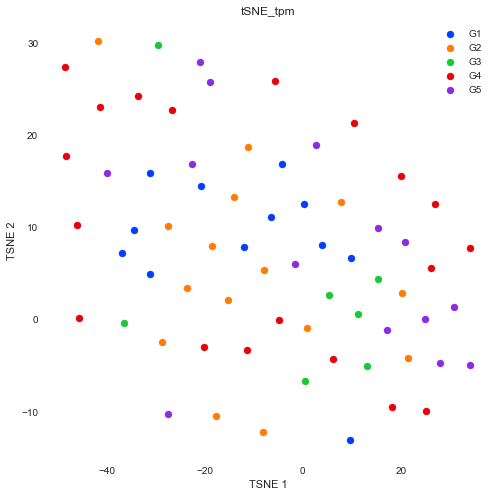

saving  ../results/2022March/EDA/TSNE_rle.png


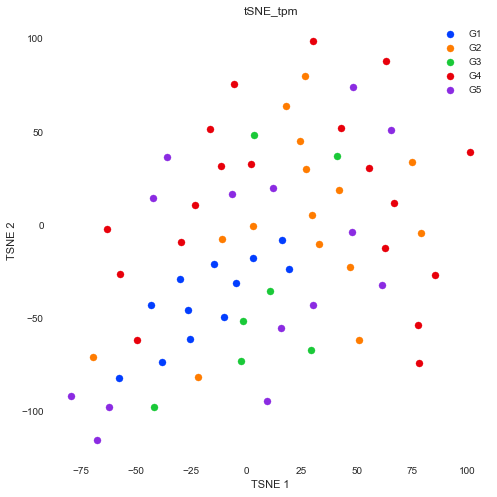

saving  ../results/2022March/EDA/UMAP.png


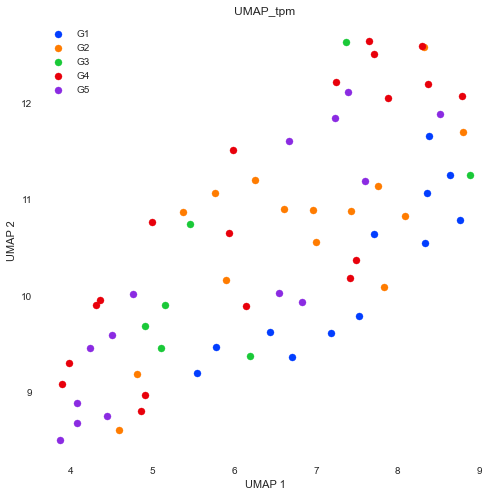

saving  ../results/2022March/EDA/UMAP_rle.png


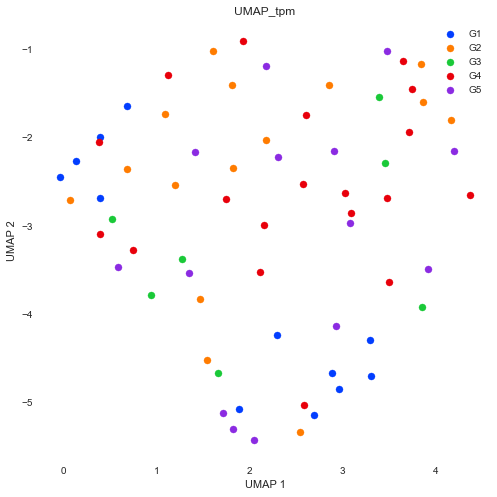

saving  ../results/2022March/EDA/PCA.png


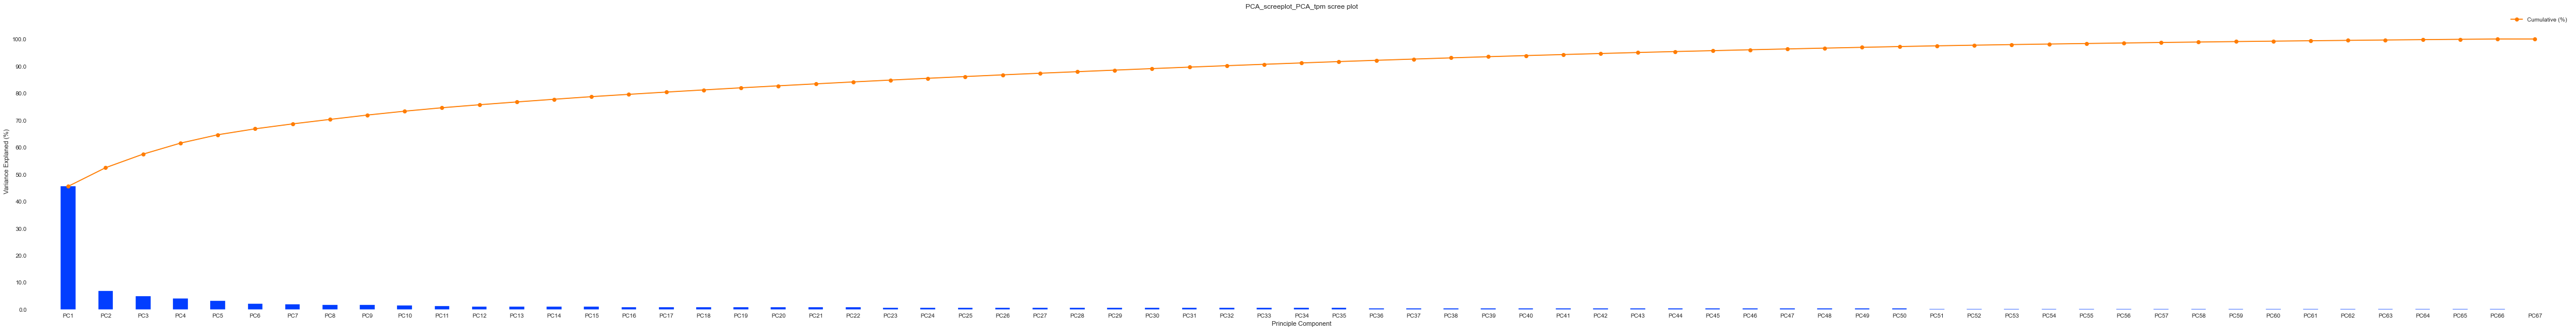

saving  ../results/2022March/EDA/PCA.png


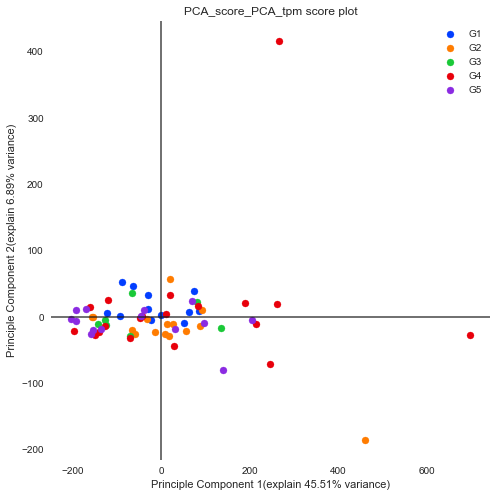

saving  ../results/2022March/EDA/PCA_rle.png


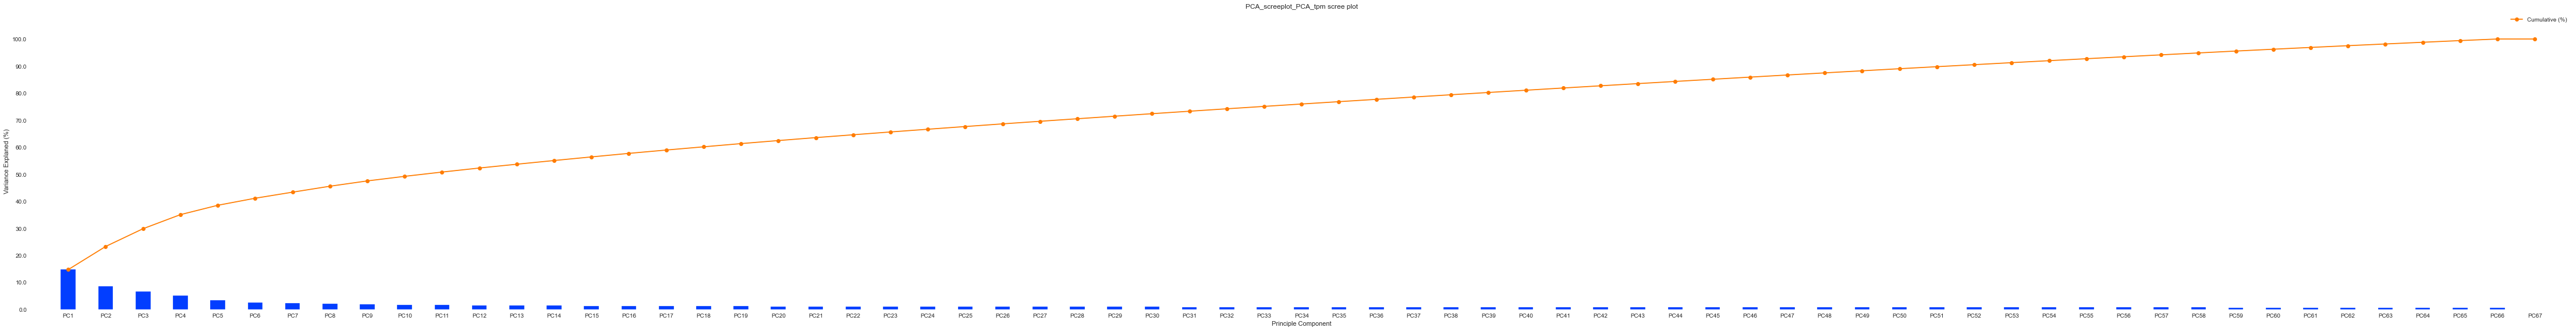

saving  ../results/2022March/EDA/PCA_rle.png


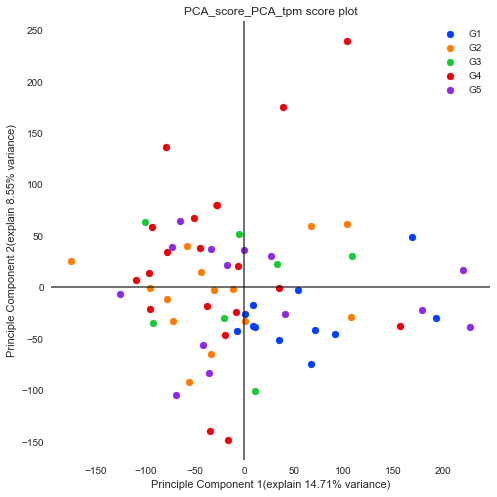

,C002A,C003A,C004A,C005A,C006A,C007A,C008A,C009A,C010A,C011A,...,R047A,R048A,R049A,R050A,R051A,R053A,R054A,R055A,R056A,R057A
PC1,1.071833e+01,5.449831e+01,8.624896e+00,8.390340e+00,-7.552877e+00,2.241857e-01,9.154547e+01,6.676190e+01,1.932511e+02,3.501457e+01,...,1.033796e+02,-5.091866e+01,-3.360991e+01,-1.754240e+02,2.281383e+02,-9.380388e+01,-7.974439e+01,-5.787633e+01,-6.533117e+01,3.868424e+01
PC2,-3.861562e+01,-2.785347e+00,-3.811005e+01,-1.677370e+01,-4.288417e+01,-2.557985e+01,-4.587494e+01,-7.482373e+01,-2.949017e+01,-5.167389e+01,...,6.153021e+01,6.772159e+01,-6.500011e+01,2.594663e+01,-3.878156e+01,5.835826e+01,1.363790e+02,4.006174e+01,6.442686e+01,1.746237e+02
PC3,-1.946193e+01,-7.388344e+01,-1.157993e+01,-2.596571e+01,1.816298e+01,-1.778082e+01,-7.422843e+01,-5.461315e+01,-7.892735e+01,-6.461836e+01,...,5.991113e+01,-8.613072e+01,-8.688302e+00,4.348015e+01,1.146906e+02,6.814876e+01,5.061222e+00,-8.903954e-01,-6.786850e-01,3.293872e+01
PC4,-7.678258e+01,-3.115486e+01,-6.133073e+01,-6.115567e+01,-6.677494e+01,-6.834121e+01,-8.254531e+00,-1.595689e+01,4.757562e+01,-3.288843e+01,...,-3.175912e+01,3.285490e+01,-7.313173e+00,2.706390e+01,2.951689e+01,-2.556448e+01,8.167297e+00,-4.846199e+01,-4.693081e+01,3.141655e+01
PC5,1.657213e+01,-9.066688e+00,2.680027e+01,-3.767700e+00,3.936076e+01,1.003992e+01,1.153223e+00,2.396882e+01,1.670099e+01,4.418529e+01,...,-2.016409e+01,1.114099e+00,7.741396e+01,-1.166833e+01,-2.800500e+01,-4.329529e+00,-6.958731e+00,5.752502e+00,2.546623e+01,1.035058e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC63,-4.727831e+00,1.102660e+02,-1.543308e+01,-2.818628e+01,6.296282e+00,-9.968075e+00,3.896328e+00,-3.834770e+01,-2.792255e+01,-1.505067e-01,...,-1.259389e-01,1.391226e+01,1.858679e+01,3.304959e+00,-1.931755e-03,1.223648e+01,-1.271598e+01,-4.911740e+00,5.707443e+00,6.819950e-01
PC64,6.503273e+00,3.838599e+00,9.925988e+00,1.543326e+01,-6.873522e+00,1.211456e+01,-7.967644e+01,-2.961070e+01,8.064915e+01,-1.611958e-01,...,1.600178e-01,-2.158637e+01,2.265157e+01,4.259016e-01,-1.829552e-01,6.622702e+00,3.178927e-01,4.288367e+00,-4.828188e+00,-4.746510e-02
PC65,3.330142e+00,-4.714484e+01,-4.657110e+00,5.029013e+00,-4.240885e+00,4.716451e+00,8.439210e+01,-5.349207e+01,-1.017464e+00,-5.442978e-02,...,-1.339899e-01,-3.776577e+01,2.550329e+01,5.262392e-01,-1.215354e+00,-1.184089e-01,-4.816178e-01,-2.557144e+00,4.928821e+00,-1.823965e+00
PC66,6.311642e+00,-3.301751e+01,7.441031e+00,2.865179e+00,-9.884189e+00,-4.092656e+00,5.582824e+00,6.090151e+00,1.233451e+00,-1.532595e+00,...,-4.312361e-01,1.089260e+02,-2.719077e+00,-4.116132e+00,1.977152e+00,3.561991e+00,-2.593965e+00,-5.194385e+00,4.104768e+00,1.311656e+00


In [18]:
sns.set(font_scale=0.8)
plt.style.use("seaborn")
plot_embedding(tpm, groups=groups, title="tSNE_tpm", reducer="TSNE", palette="bright",
               transform_func=transform_func, random_state=42, file_name="../results/2022March/EDA/TSNE.png", dpi=450)

plot_embedding(rle, groups=groups, title="tSNE_tpm", reducer="TSNE", palette="bright",
               transform_func=transform_func, random_state=42, file_name="../results/2022March/EDA/TSNE_rle.png", dpi=450)

plot_embedding(tpm, groups=groups, title="UMAP_tpm", reducer="UMAP", palette="bright",
               transform_func=transform_func, random_state=42, file_name="../results/2022March/EDA/UMAP.png", dpi=450)

plot_embedding(rle, groups=groups, title="UMAP_tpm", reducer="UMAP", palette="bright",
               transform_func=transform_func, random_state=42, file_name="../results/2022March/EDA/UMAP_rle.png", dpi=450)

plot_PCA(tpm, groups=groups, title="PCA_tpm",palette="bright",
         transform_func=transform_func,
         file_name="../results/2022March/EDA/PCA.png", dpi=450)

plot_PCA(rle, groups=groups, title="PCA_tpm",palette="bright",
         transform_func=transform_func,
         file_name="../results/2022March/EDA/PCA_rle.png", dpi=450)

In [19]:
tpm = tpm[tpm.T.std() > 1]
tpm = np.log2(tpm + 1)

In [20]:
rle = np.log2(rle + 1)
rle = rle[rle.T.std() > 1]

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\results\2022March\EDA\TPM_clustermap_batch.png


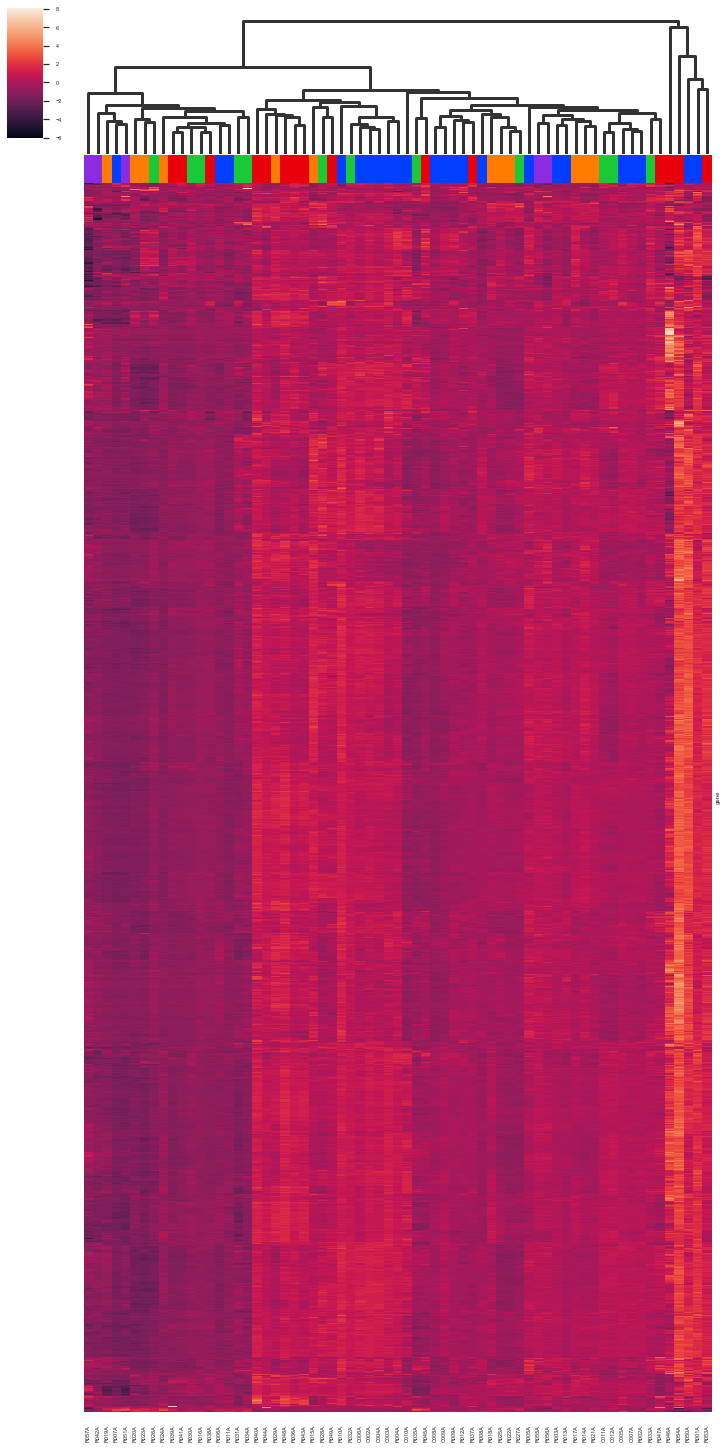

{'g': <seaborn.matrix.ClusterGrid at 0x1db2ed4c240>}

In [21]:
sns.set(font_scale=0.5)
plot_clustermap(tpm, {sample_name: grp_name for grp_name, samples in batches.items() for sample_name in samples}, 
                group_list=list(batches.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="bright",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../results/2022March/EDA/TPM_clustermap_batch.png"), prefix="", dpi=600
               )

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\results\2022March\EDA\TPM_clustermap_groups.png


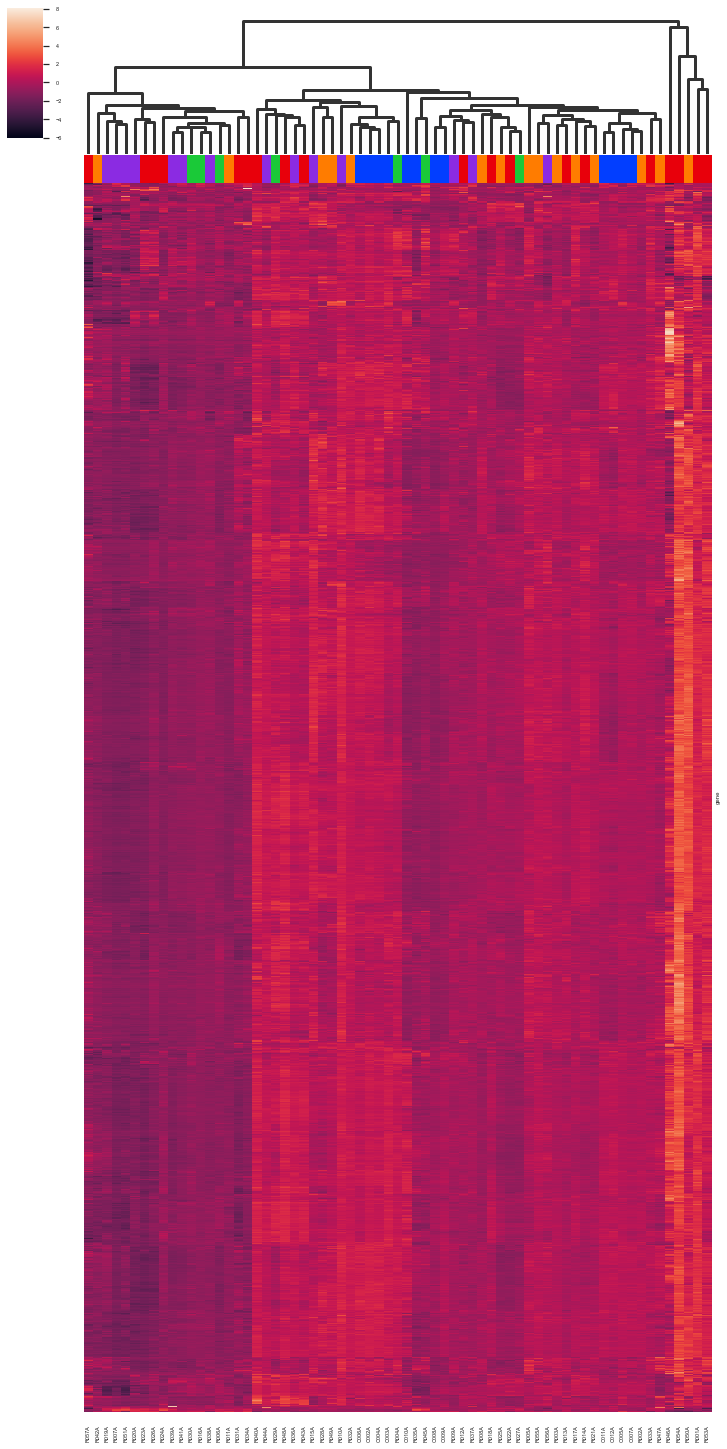

{'g': <seaborn.matrix.ClusterGrid at 0x1db315d75c0>}

In [22]:
sns.set(font_scale=0.5)
plot_clustermap(tpm, {sample_name: grp_name for grp_name, samples in groups.items() for sample_name in samples}, 
                group_list=list(groups.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="bright",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../results/2022March/EDA/TPM_clustermap_groups.png"), prefix="", dpi=600
               )

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\results\2022March\EDA\RLE_clustermap_groups.png


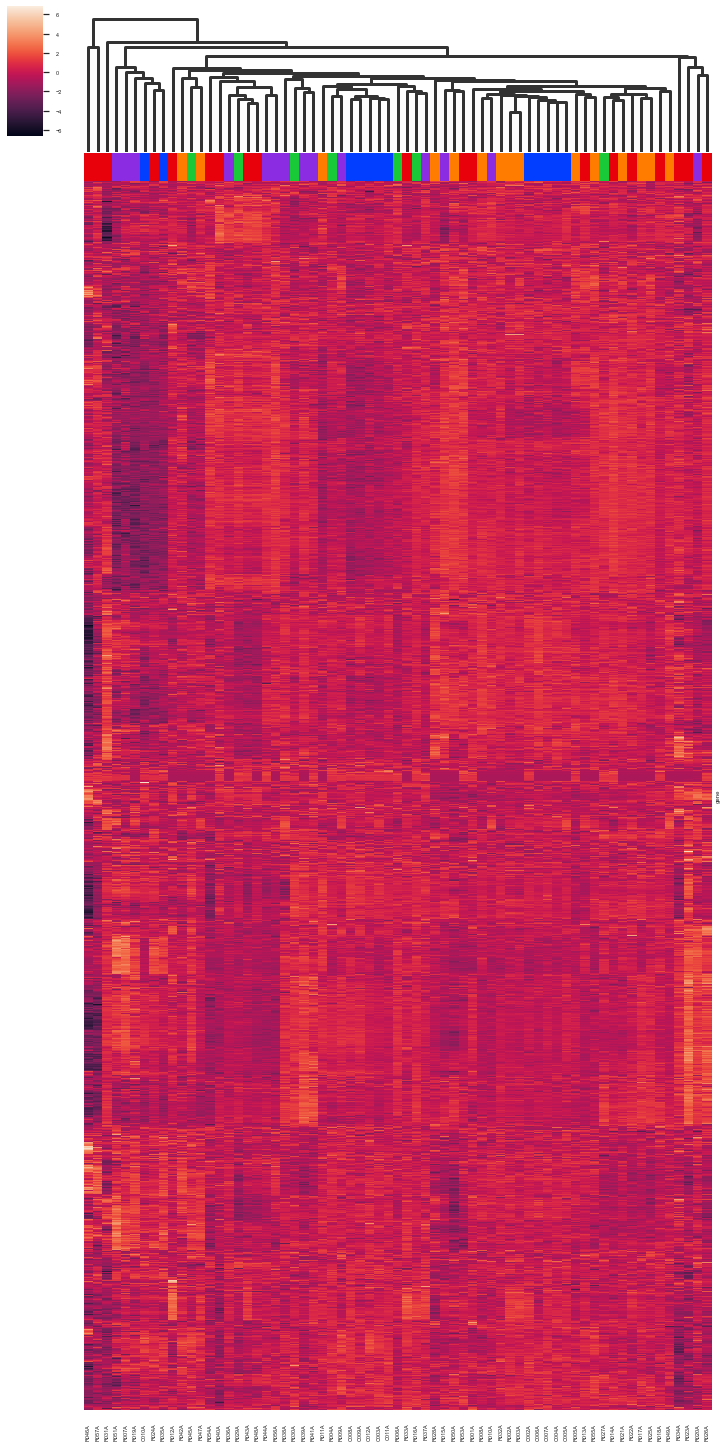

{'g': <seaborn.matrix.ClusterGrid at 0x1db2ed4c080>}

In [24]:
sns.set(font_scale=0.5)
plot_clustermap(rle, {sample_name: grp_name for grp_name, samples in groups.items() for sample_name in samples}, 
                group_list=list(groups.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="bright",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../results/2022March/EDA/RLE_clustermap_groups.png"), prefix="", dpi=600
               )

In [25]:
# DEG

In [32]:
rle = pd.read_csv(Path("../data/mg_RLE.tsv"), sep='\t', index_col=0)

In [30]:
cpr = ["2_1", "4_1", "5_1", "4_2", "5_2"]
lis = []
for c in cpr:
    lis += pd.read_csv(f"../results/2022March/DEG/tables/DEG_list_{c}.tsv", sep='\t')["DGE"].to_list()

In [31]:
len(set(lis))

3408

In [36]:
rle = rle.loc[set(lis), :]

C:\Users\user\Anaconda3\envs\CBM\lib\site-packages\seaborn\matrix.py:649 UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


saving  ..\results\2022March\EDA\RLE_DEG_clustermap_groups.png


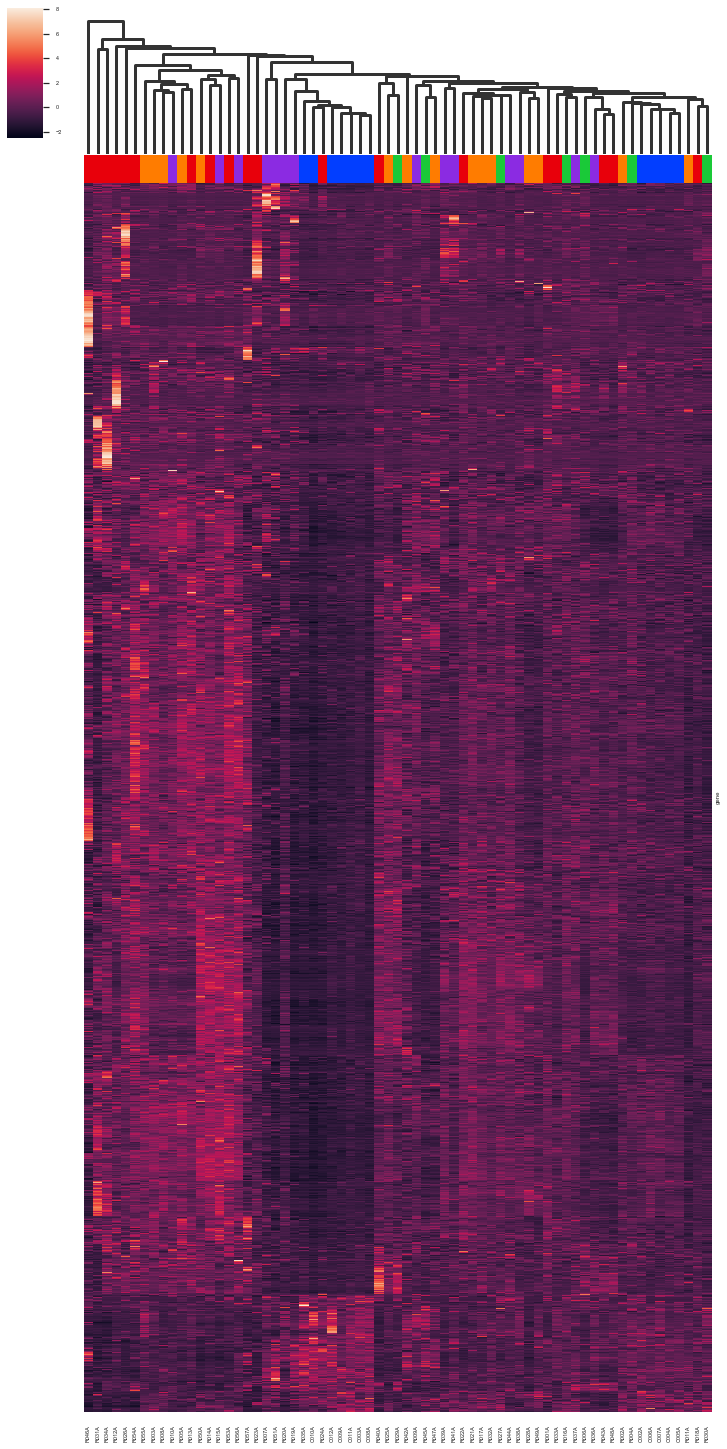

{'g': <seaborn.matrix.ClusterGrid at 0x1db35dec4a8>}

In [37]:
plot_clustermap(rle, {sample_name: grp_name for grp_name, samples in groups.items() for sample_name in samples}, 
                group_list=list(groups.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="bright",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../results/2022March/EDA/RLE_DEG_clustermap_groups.png"), prefix="", dpi=600
               )

saving  ../results/2022March/EDA/PCA_rle_deg.png


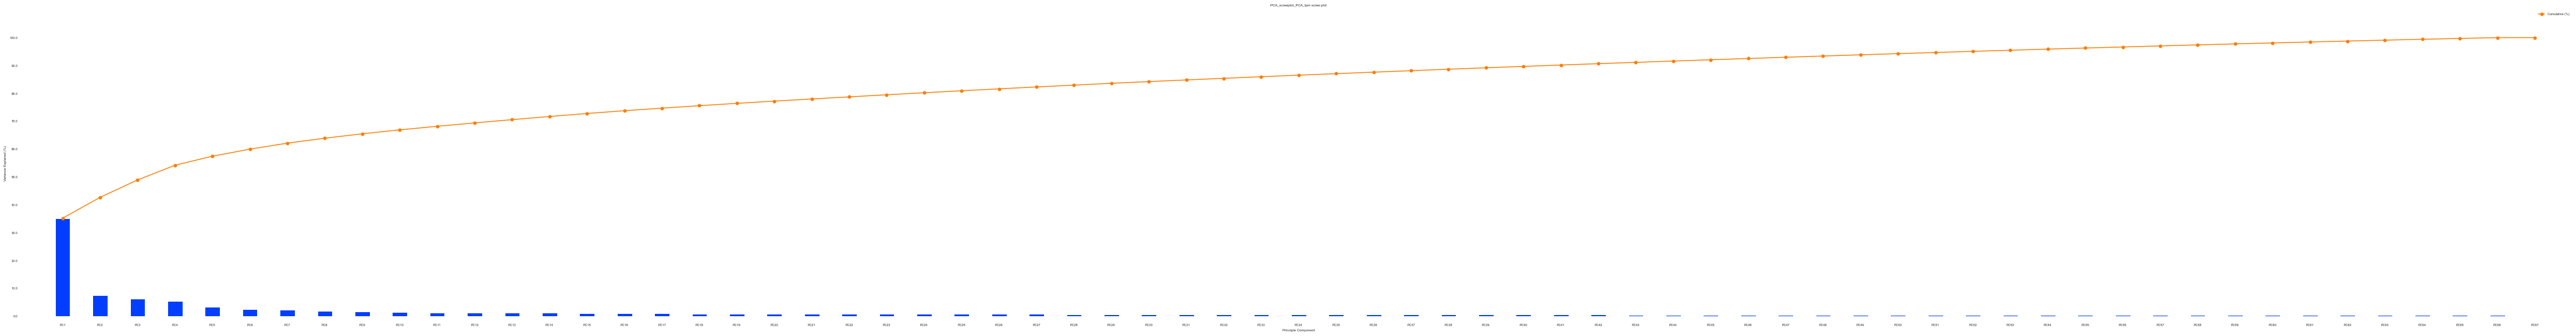

saving  ../results/2022March/EDA/PCA_rle_deg.png


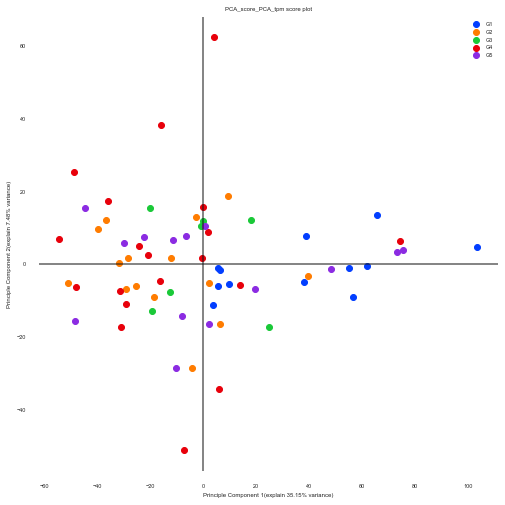

saving  ../results/2022March/EDA/TSNE_rle_deg.png


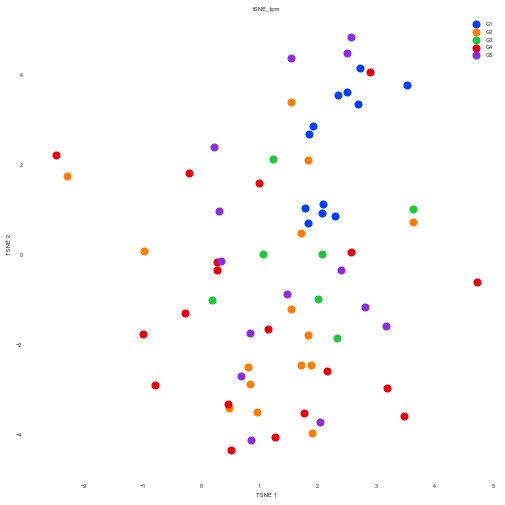

saving  ../results/2022March/EDA/UMAP_rle_deg.png


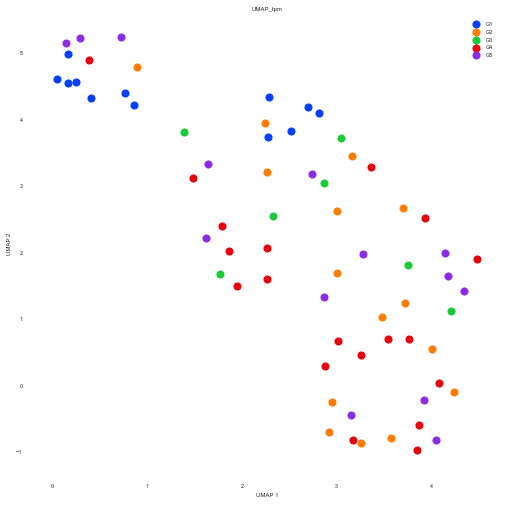

{'g': <Figure size 504x504 with 1 Axes>}

In [39]:
plot_PCA(rle, groups=groups, title="PCA_tpm",palette="bright",
         transform_func=transform_func,
         file_name="../results/2022March/EDA/PCA_rle_deg.png", dpi=450)

plot_embedding(rle, groups=groups, title="tSNE_tpm", reducer="TSNE", palette="bright",
               transform_func=transform_func, random_state=42, file_name="../results/2022March/EDA/TSNE_rle_deg.png", dpi=450)

plot_embedding(rle, groups=groups, title="UMAP_tpm", reducer="UMAP", palette="bright",
               transform_func=transform_func, random_state=42, file_name="../results/2022March/EDA/UMAP_rle_deg.png", dpi=450)

In [6]:
ipa_bmk = pd.read_clipboard(header=None)

saving  ..\results\2022March\EDA\RLE_biomarkers.png


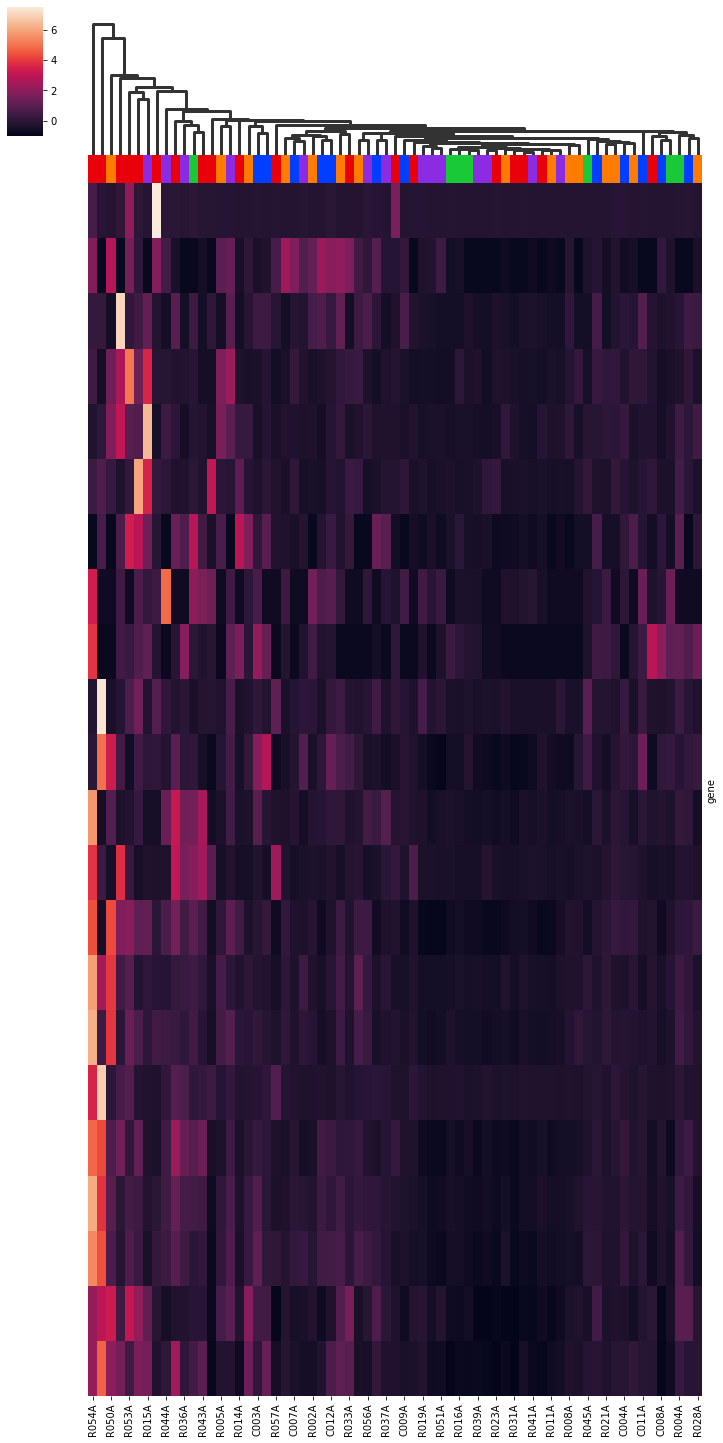

{'g': <seaborn.matrix.ClusterGrid at 0x1d97a297710>}

In [15]:
plot_clustermap(tpm.loc[ipa_bmk.iloc[:, 0].to_list(), :], {sample_name: grp_name for grp_name, samples in groups.items() for sample_name in samples}, 
                group_list=list(groups.keys()), z_score=0, yticklabels=False, 
                row_cluster=True, row_dendrogram=False, 
                #col_colors=pd.Series(colors),
                palette="bright",
                #c_bar_label=r"$log_2(TPM + 1)$",
                tree_kws={"linewidths": 3}, fig_size=(10, 20), 
                file_name=Path("../results/2022March/EDA/RLE_biomarkers.png"), prefix="", dpi=600
               )